In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('german.csv')

In [5]:
df.drop(columns='Unnamed: 0',axis="columns",inplace=True)

In [6]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [7]:
df.shape

(1000, 9)

In [8]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [10]:
df.isnull().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
dtype: bool

In [11]:
df.drop("Checking account",axis="columns",inplace=True)

In [12]:
#dengan menggunakan metode forward fill untuk mengatasi nilai NaN alias missing values pada data.

df["Saving accounts"].fillna(method="bfill",inplace=True)

In [13]:
df.isnull().any()

Age                False
Sex                False
Job                False
Housing            False
Saving accounts    False
Credit amount      False
Duration           False
Purpose            False
dtype: bool

In [14]:
df['Saving accounts'].value_counts()

little        739
moderate      122
quite rich     81
rich           58
Name: Saving accounts, dtype: int64

In [15]:
unik = df.nunique()
print("Number of unique values:\n{}".format(unik))

Number of unique values:
Age                 53
Sex                  2
Job                  4
Housing              3
Saving accounts      4
Credit amount      921
Duration            33
Purpose              8
dtype: int64


In [16]:
print("Kategorikal dari nilai unik setiap kolom:")
for col in df.select_dtypes(include=[object]):
    print(col,":", df[col].unique())

Kategorikal dari nilai unik setiap kolom:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : ['little' 'quite rich' 'rich' 'moderate']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


## Data Exploration

Sebelum memulai data eksplorasi, saya terlebih dahulu menentukan variabel atau kolom apa saja yang saya ingin eksplor, diawali dengan melihat nilai korelasi variabel target (**jumlah kredit**) terhadap nilai variabel lainnya sebagai berikut.

Yang mana setelah dilihat korelasinya, terdapat 3 variabel utama yang dapat kita eksplor dan menghiraukan variabel lainnya yang tidak berkorelasi (efisiensib waktu), yaitu 

1. *Age*
2. *Job*
3. *Duration*

In [17]:
df.corrwith(df["Credit amount"],axis=0)

Age              0.032716
Job              0.285385
Credit amount    1.000000
Duration         0.624984
dtype: float64

In [18]:
def scatters(data, h=None, pal=None):
    sns.lmplot(x="Credit amount",y="Duration", data = data, fit_reg = False, hue = h, size = 6, aspect = 1)
    sns.lmplot(x="Age",y="Credit amount", data = data, fit_reg = False, hue = h, size = 6, aspect = 1)
    sns.lmplot(x="Age",y="Duration", data = data, fit_reg = False, hue = h, size = 6, aspect = 1)
    plt.tight_layout()

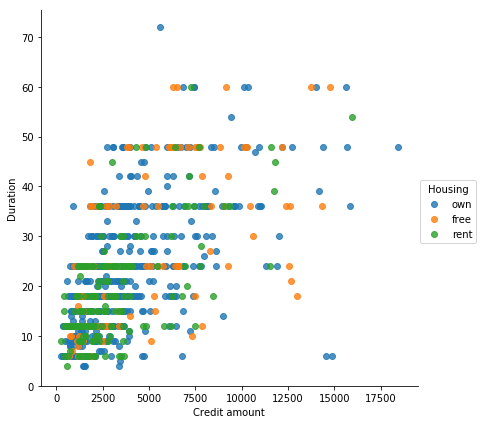

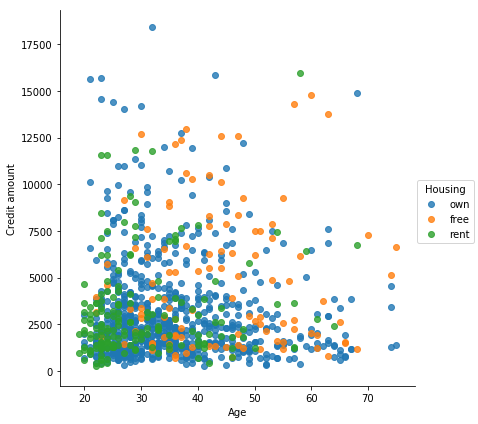

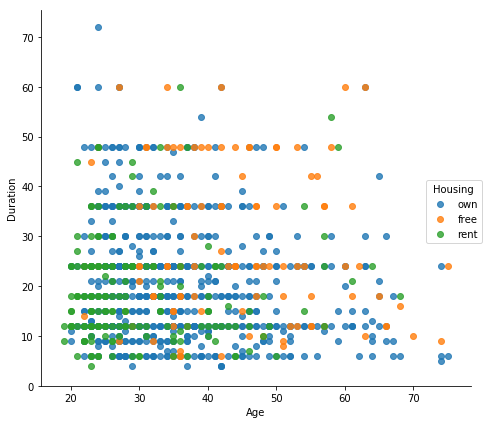

In [19]:
scatters(df, h="Housing")

Secara umum, hasil plot yang ditampilkan dapat kita tarik kesimpulan visual (kesimpulan yang diambil setelah mengamati plot/grafik/chart) bahwa terdapat kemungkinan korelasi yang positif antara durasi pelunasan kredit dengan jumlah kredit yang diajukan. 

Untuk itu, kita dapat memastikan secara tepat apakah memang terdapat korelasi linear atau tidak antara jumlah kredit dan durasinya pada dataset.

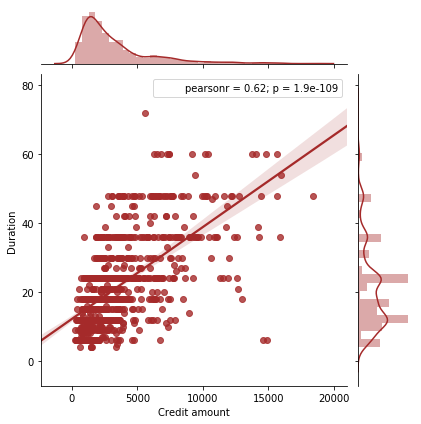

In [20]:
import scipy.stats as stats
r1 = sns.jointplot(x="Credit amount",y="Duration", data=df, kind="reg", color='brown')
r1.annotate(stats.pearsonr)
plt.show()

Ternyata, plot korelasi antara **Credit amount** dan **Duration** menunjukkan adanya korelasi linear positif dengan nilai statistik Pearson 0.62 dan nilai *p value* yang sangat kecil (*appx.* 0,00000000019). Berikutnya, akan dilakukan analisa regresi linier dengan varias yang berbeda terhadap kategorinya.

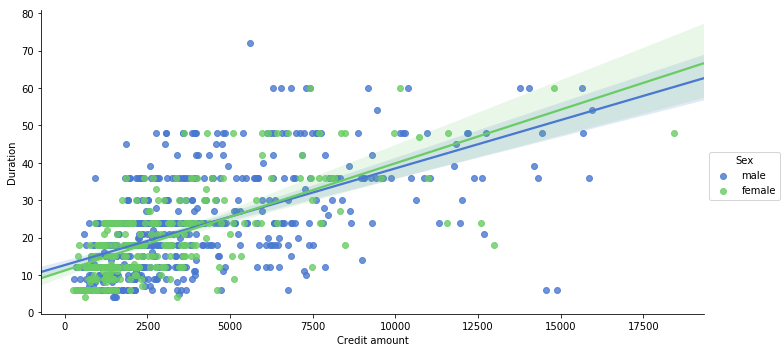

In [21]:
sns.lmplot(x="Credit amount",y="Duration", hue="Sex", data=df, palette="muted", aspect=2)
plt.show()

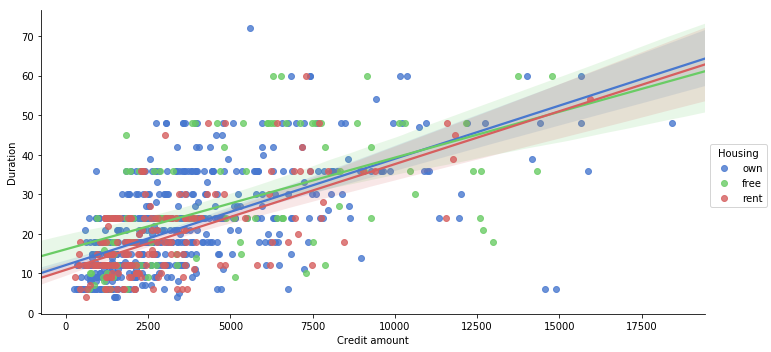

In [22]:
sns.lmplot(x="Credit amount",y="Duration", hue="Housing", data=df, palette="muted", aspect=2)
plt.show()

Plot diatas menunjukkan untuk kategori **housing** dan **sex** ternyata tidak memiliki perbedaan yang mencolok, justru terdapat kemiripan pada hasil plotnya.

Sekarang, bagaimana bila kita ingin melihat kategori peminjaman apa saja yang banyak diterima/diajukan oleh peminjam? Plot di bawah ini dapat menunjukkan hasilnya.

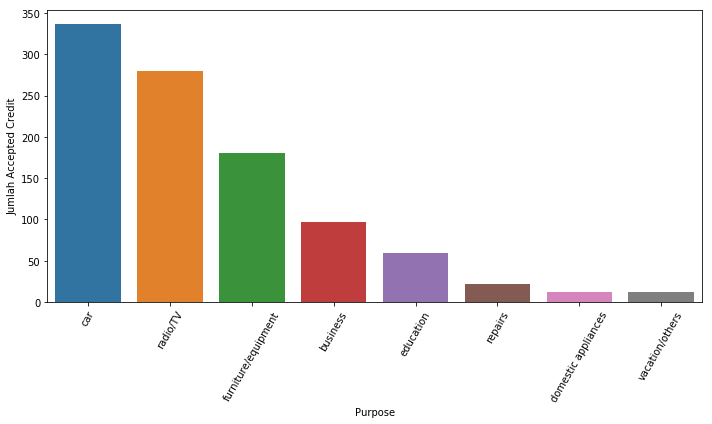

In [23]:
kredit = df.groupby("Purpose")["Age"].count().rename("Count").reset_index()
kredit.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=kredit)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Jumlah Accepted Credit")
plt.tight_layout()

Barplot diatas menunjukkan bahwa rupanya jumlah kredit yang diajukan dan diterima lebih banyak untuk tujuan pembelian mobil dan radio/TV. Sekarang, dengan informasi ini kita dapat melanjutkan eksplorasi lebih detail terhadap variabel kategorikal lainnya.

In [24]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

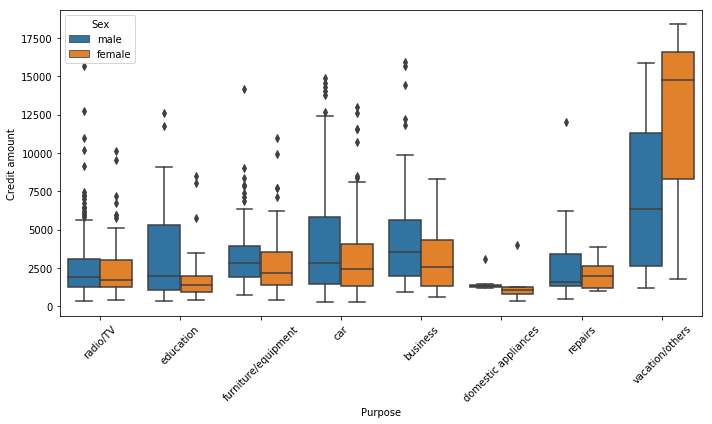

In [25]:
boxes("Purpose","Credit amount","Sex")

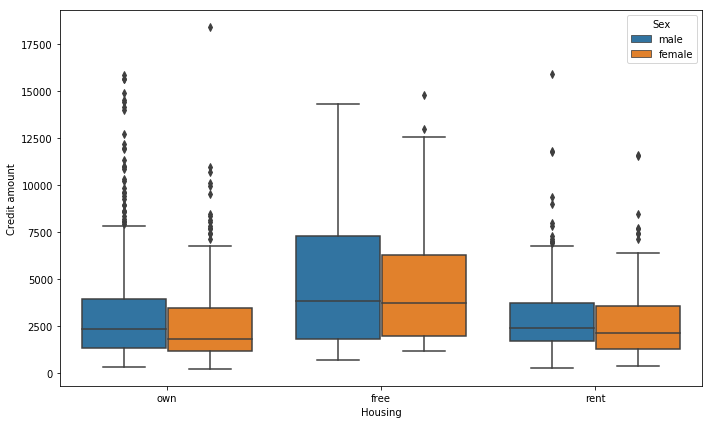

In [27]:
boxes("Housing","Credit amount","Sex",r=0)

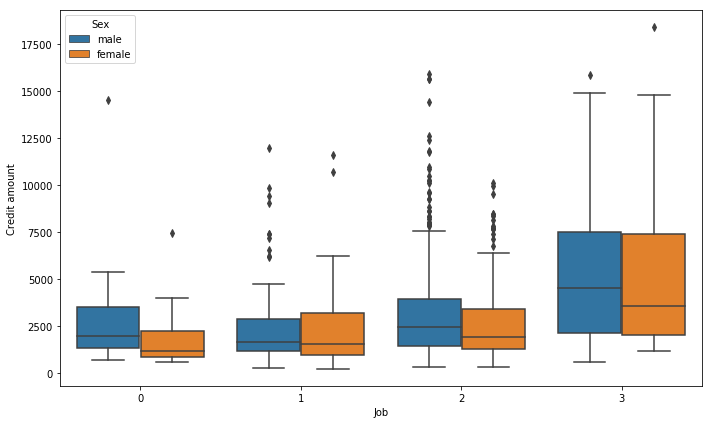

In [28]:
boxes("Job","Credit amount","Sex",r=0)

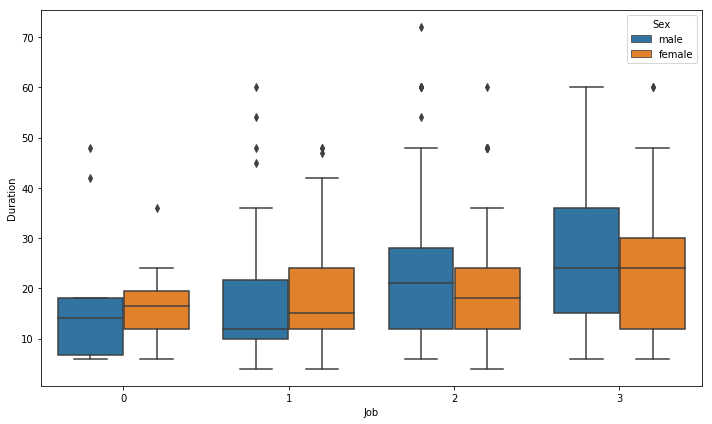

In [29]:
boxes("Job","Duration","Sex",r=0)

Text(0.5,0,'Usia')

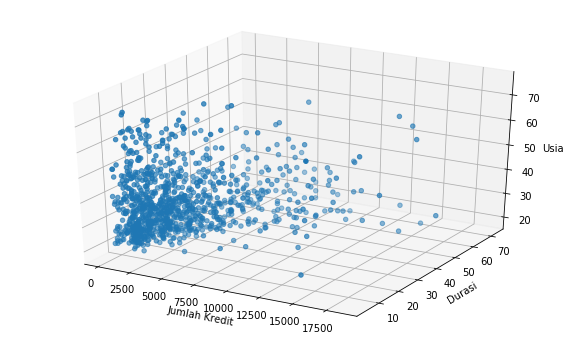

In [30]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Credit amount"], df["Duration"], df["Age"])
ax.set_xlabel("Jumlah Kredit")
ax.set_ylabel("Durasi")
ax.set_zlabel("Usia")

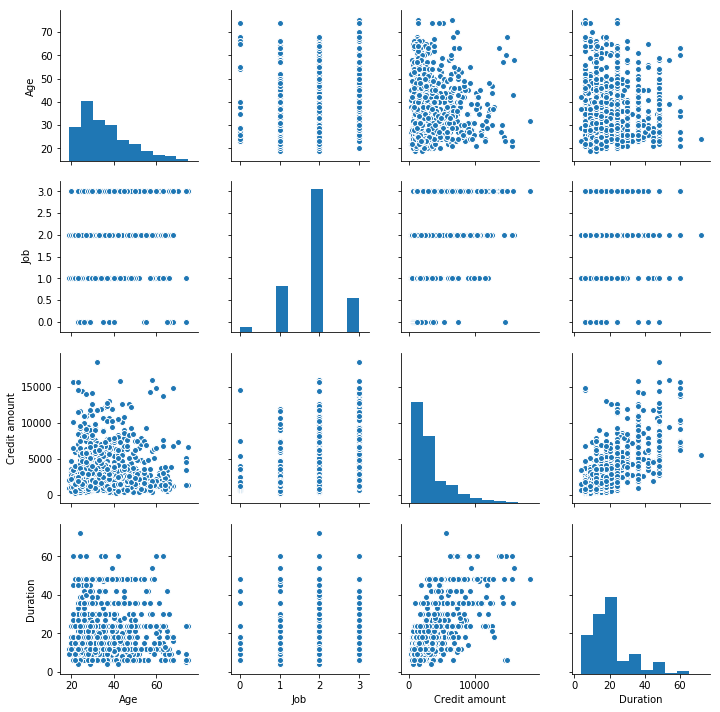

In [31]:
sns.pairplot(df)

Dari hasil keseluruhan (both of box and bar plot), tidak ada kategori yang terlalu stabil untuk dijadikan variabel penelitian selain yang didapatkan dari hasil perhitungan nilai korelasi antar variabel (*job*, *duration*, *age*)

Contoh, untuk kategori *housing* meskipun ia memiliki unit rumah gratis (*free*) tidak menjamin bahwa kreditnya rendah, justru berdasarkan hasil bar plot whisker menunjukkan hal yang sebaliknya, kategori *free housing* memiliki tingkat pengajuan kredit yang sangat tinggi.

### 1. Clustering with KMeans

Untuk clustering, saya memilih untuk menggunakan variabel yang berkorelasi positif dan memiliki nilai numerikal pada datanya, yaitu, **age**, **credit amount**, dan **duration**.

In [32]:
#Selecting columns for clusterisation with k-meanst

kelompok = ["Age","Credit amount", "Duration"]
cluster = df.loc[:,kelompok]

In [33]:
cluster.head()

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


In [34]:
def distributions(data):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(data["Age"], ax=ax1)
    sns.distplot(data["Credit amount"], ax=ax2)
    sns.distplot(data["Duration"], ax=ax3)
    plt.tight_layout()

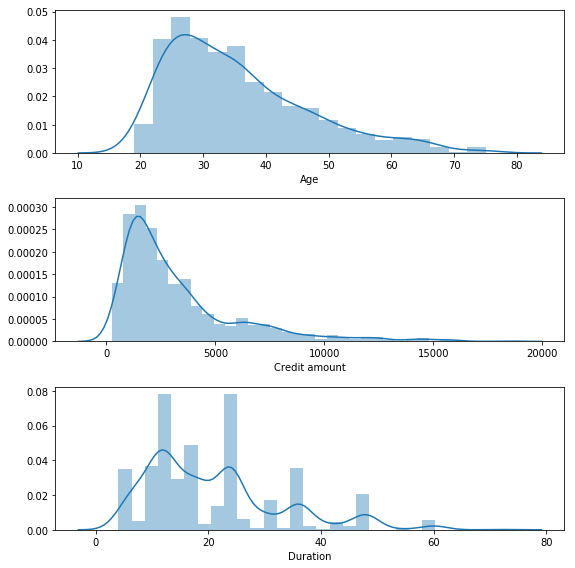

In [35]:
distributions(cluster)

Dari plot distribusi yang kita dapatkan, diketahui bahwa data penelitian kita masih condong ke kanan, tidak simetris/seimbang makin ke arah kanan. Untuk mengatasi hal tersebut, kita bisa gunakan transformasi logaritmik sebagai berikut.

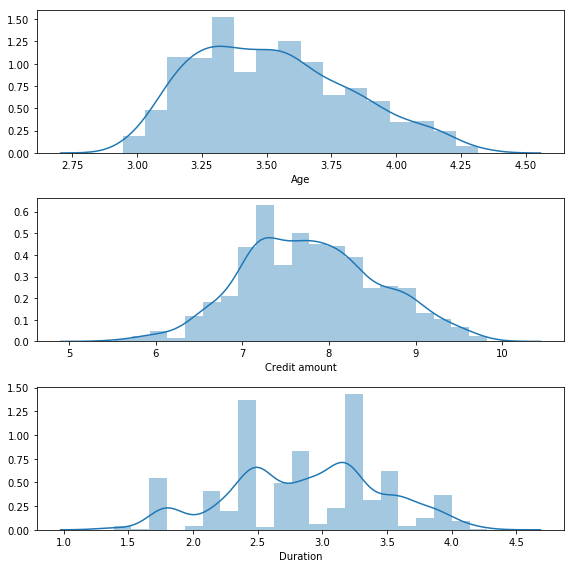

In [36]:
cluster_log = np.log(cluster)
distributions(cluster_log)

Dapat kita lihat bahwa nilai distribusi dari penelitian kita sudah cukup baik, sehingga memungkinkan untuk kita lanjutkan ke pemodelan *clustering* K-means ini, dengan langkah selanjutnya adalah mengaplikasikan metode *centering* dan *scaling* dari variabel penelitian (umumnya menggunakan StandardScaler module).

In [37]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)

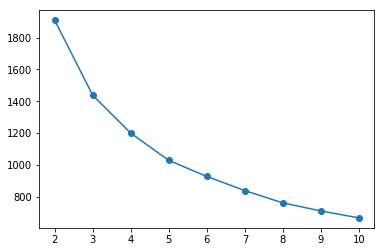

In [38]:
clusters_range = [2,3,4,5,6,7,8,9,10]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

The plot above shows that inertia decreases with increasing number of clusters.

This method allows for assessment of cluster separations and fitting of each observation in its own cluster. The highest score the better. I will perform this analysis for various seeds as well.

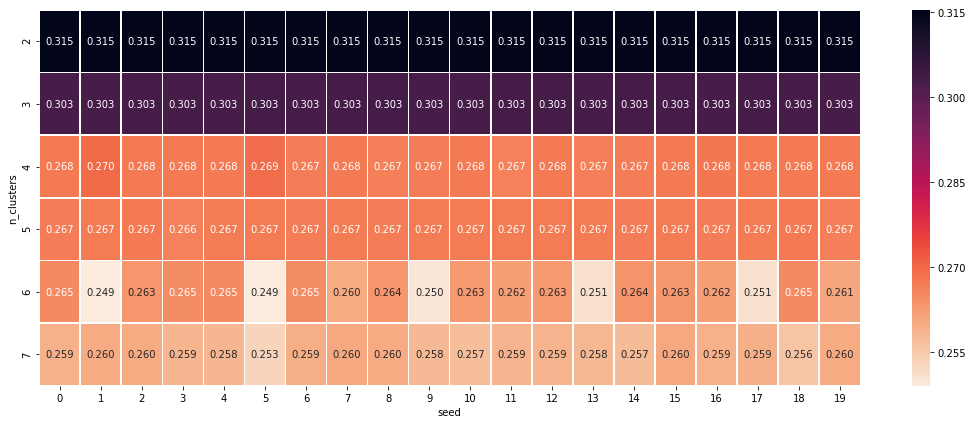

In [39]:
from sklearn.metrics import silhouette_samples, silhouette_score

jumlah_klaster = range(2,8)
random_range = range(0,20)
results =[]
for c in jumlah_klaster:
    for r in random_range:
        klaster = KMeans(n_clusters=c, random_state=r) #kmeans
        label_kelas = klaster.fit_predict(cluster_scaled) #y_kmeans
        rata_silhoutte = silhouette_score(cluster_scaled, label_kelas)
        results.append([c,r,rata_silhoutte])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

Dari hasil plotting heatmap antara jumlah klaster dengan seed (jumlah kolom pada data) terdapat satu hal paling jelas yang dapat kita tarik sebagai pengambilan keputusan, yaitu ternyata klaster 2 dan 3 merupakan klaster yang paling stabil terhadap nilai data penelitian dan juga skor *silohoutte*nya cenderung tidak terpengaruh. 

Karena itu, kita gunakan model dengan 3 klaster sebagai lanjutan untuk kita analisa terhadap data.

In [40]:
kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
hasil_klaster = cluster.assign(Cluster=labels)

Below I will create silhouette graph for 3 clusters in order to visually depict fit of each point within its own cluster (modified code from scikit-learn doc).

Untuk jumlah cluster = 3  dan jumlah kolom data (seed) = 19 
Rata-rata silhouette score nya adalah: 0.30318933408774545


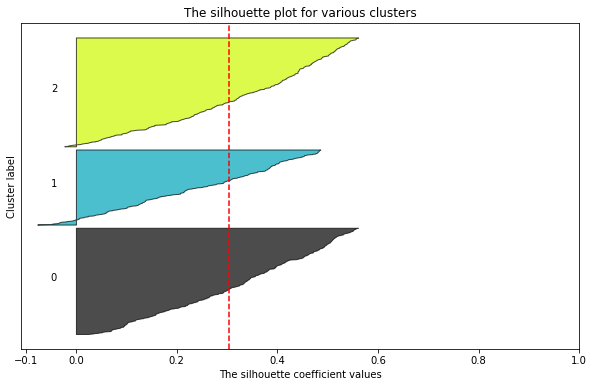

In [44]:
import matplotlib.cm as cm

nilklaster = KMeans(n_clusters=3, random_state=None)
cluster_labels = nilklaster.fit_predict(cluster_scaled) #y_kmeans
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
print("Untuk jumlah cluster =", 3," dan jumlah kolom data (seed) =", r,  "\nRata-rata silhouette score nya adalah:", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(cluster_scaled, cluster_labels)

fig, ax1 = plt.subplots(figsize=(10,6))

y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor=color, edgecolor="black", alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.get_yaxis().set_ticks([])
ax1.set_title("The silhouette plot for various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

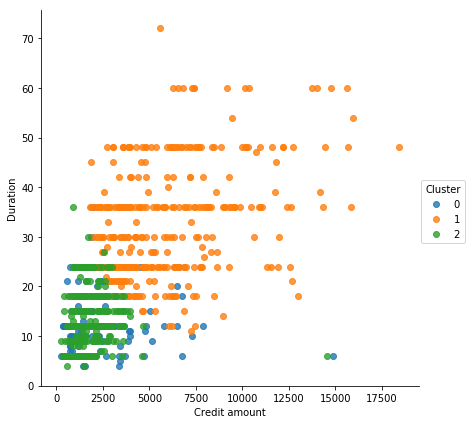

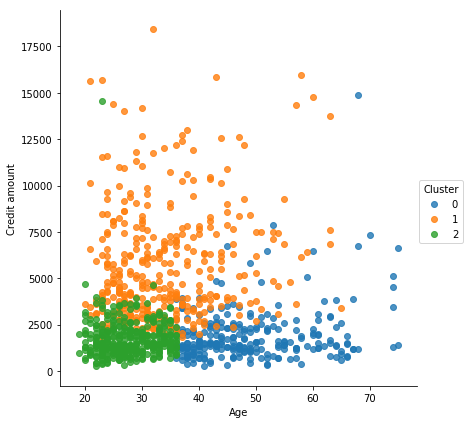

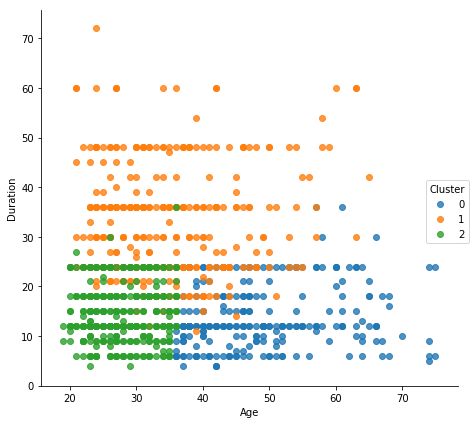

In [46]:
scatters(hasil_klaster, 'Cluster')

Selanjutnya, dibuatkan grup untuk masing-masing kluster (disatukan) agar mudah diinterpretasi dan dibaca dengan model klastering akhir sebagai berikut,

In [49]:
grouped_km = hasil_klaster.groupby(['Cluster']).mean().round(1)
grouped_km

,Age,Credit amount,Duration
Cluster,,,
0,48.6,1970.5,13.9
1,34.0,5665.4,32.2
2,27.7,1737.5,14.3


**Clustering menggunakan Model Affinity Propagation**

Untuk memastikan kelanjutan apakah dibutuhkan penambahan atau pengurangan pada model klaster yang dibentuk, kita dapat adaptasikan model *Clustering with Affinity Propagation*. Pada model ini, ia menggunakan parameter *preference* dan *damping*. Pada model ini kita tidak perlu menentukan jumlah klaster yang ingin dibangkitkan, kita akan menghitungnya dengan model *AffinityPropagation* itu sendiri dan melihat hasil plotnya.

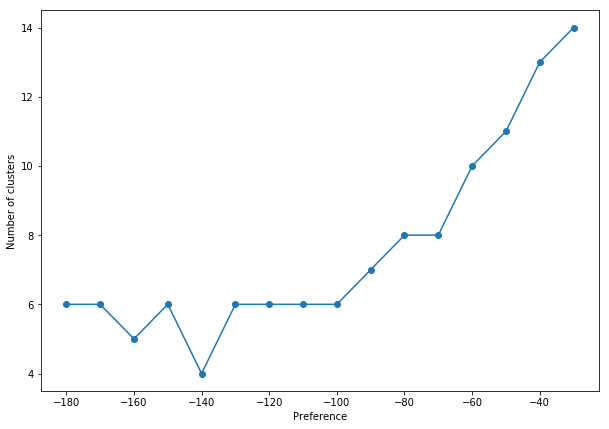

In [50]:
preferences = np.arange(-30,-190,-10)
clusters = []

for p in preferences:
    af = AffinityPropagation(preference=p, damping=0.6, max_iter=400, verbose=False).fit(cluster_scaled)
    labels_af = pd.DataFrame(af.labels_)
    clusters.append(len(af.cluster_centers_indices_))

plt.figure(figsize=(10,7))
plt.xlabel("Preference")
plt.ylabel("Number of clusters")
plt.plot(preferences,clusters, marker='o')

Dari peniliain *preference* dan *number of circle* kita bisa menggunakan model dengan kluster 4 agar lebih tepat dalam pembagian kelasnya yang saling terkait satu sama lain. Berikutnya kita gunakan model *AffinityPropagation* dengan nilai preference -140 (4 klaster).

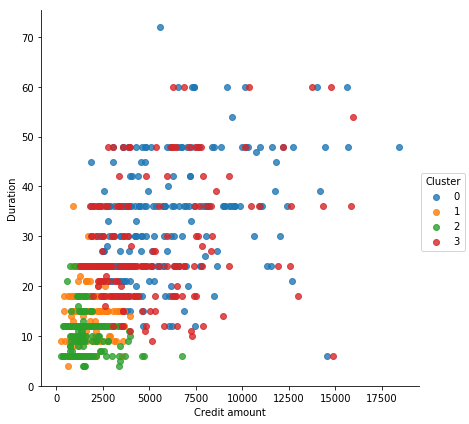

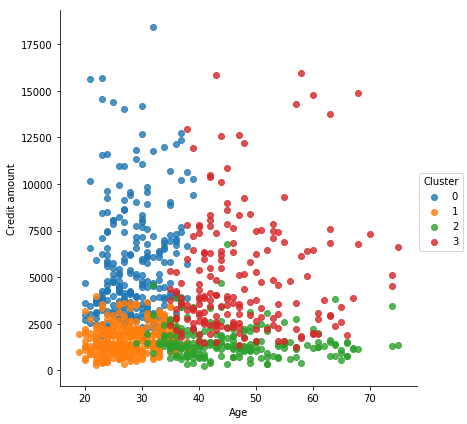

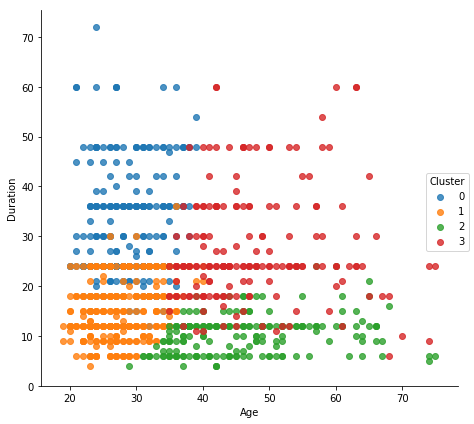

In [359]:
af = AffinityPropagation(preference=-10, damping=0.6, verbose=False).fit(cluster_scaled)
labels_af = pd.DataFrame(af.labels_)
n_clusters_ = len(af.cluster_centers_indices_)

clustered_data_af = cluster.assign(Cluster=labels_af)
scatters(clustered_data_af,'Cluster')

grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)

In [364]:
grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)
grouped_af

,Age,Credit amount,Duration
Cluster,,,
0,28.7,5593.7,32.2
1,27.9,1654.3,15.1
2,46.0,1551.7,10.7
3,47.5,4977.9,27.6


In [367]:
silhouette_score(cluster_scaled, labels, metric='euclidean')

0.302902483090709

### 2. Clustering with Hierarchial Clustering

Hierarchical Clustering adalah metode analisis kelompok yang berusaha untuk membangun sebuah hirarki kelompok data. Strategi pengelompokannya umumnya ada 2 jenis yaitu **Agglomerative (Bottom-Up)** dan **Devisive (Top-Down)**.

Pada model ini digunakan strategi Agglomerative, karena pada dasarnya data ini memang digunakan untuk pengambilan keputusan, dan juga penentuan kedekatan diantara kelompok baru dan kelompok yang masih tersisa.



**Algoritma Model Agglomerative**

1. Hitung Matrik Jarak antar data.
2. Gabungkan dua kelompok terdekat berdasarkan parameter kedekatan yang ditentukan.
3. Perbarui Matrik Jarak antar data untuk merepresentasikan kedekatan diantara kelompok baru dan kelompok yang masih tersisa.
4. Ulangi langkah 2 dan 3 higga hanya satu kelompok yang tersisa.

*src: [informatikalogi](https://informatikalogi.com/algoritma-hierarchical-clustering/)*

### 2.1 Model Ward

In [158]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(cluster_scaled)

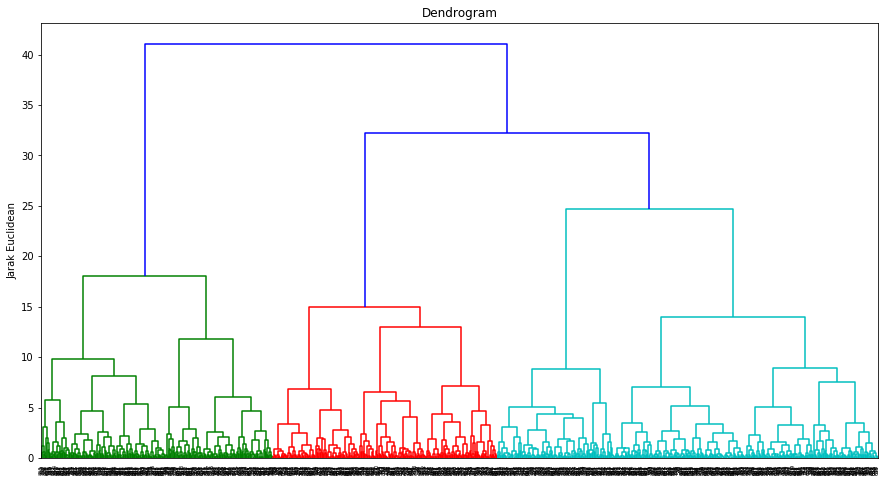

In [159]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(cluster_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Jarak Euclidean')
plt.show()

### 2.2 Model Complete

In [160]:
from sklearn.cluster import AgglomerativeClustering
hc1 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
y_hc1 = hc1.fit_predict(cluster_scaled)

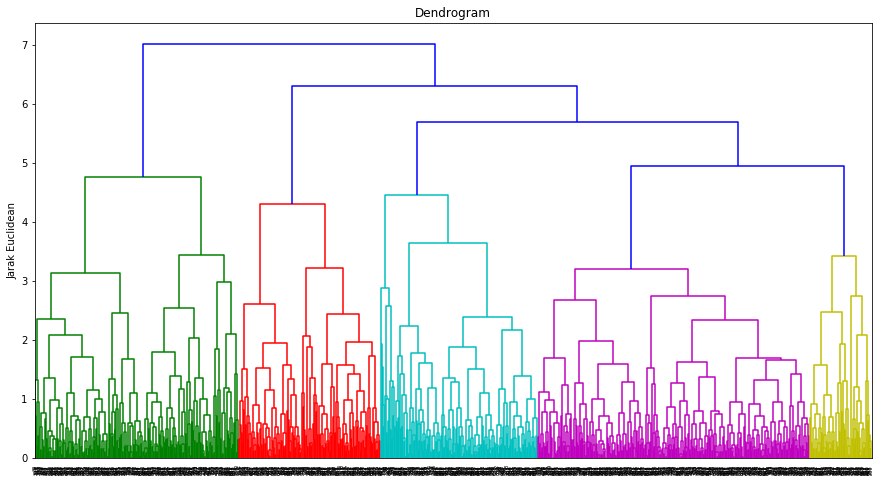

In [161]:
plt.figure(figsize=(15,8))
dendrogram1 = sch.dendrogram(sch.linkage(cluster_scaled, method = 'complete'))
plt.title('Dendrogram')
plt.ylabel('Jarak Euclidean')
plt.show()

### 2.3 Single Method

In [162]:
from sklearn.cluster import AgglomerativeClustering
hc2 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'single')
y_hc2 = hc2.fit_predict(cluster_scaled)

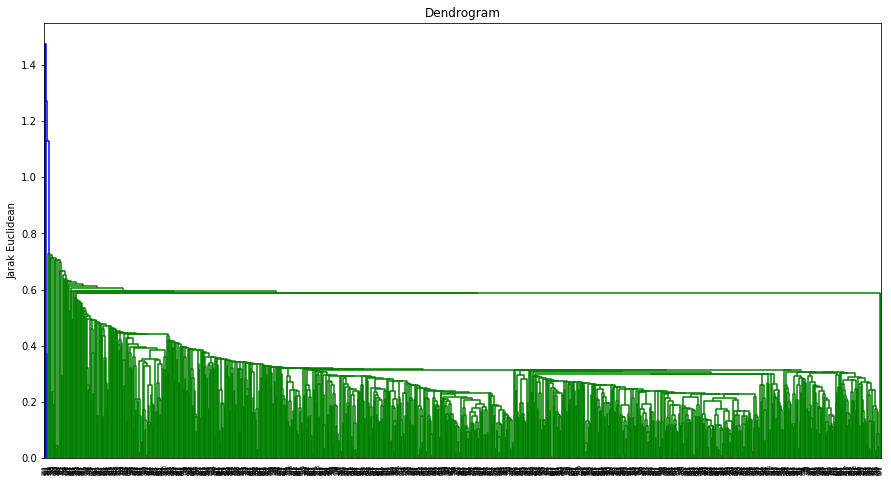

In [163]:
plt.figure(figsize=(15,8))
dendrogram2 = sch.dendrogram(sch.linkage(cluster_scaled, method = 'single'))
plt.title('Dendrogram')
plt.ylabel('Jarak Euclidean')
plt.show()

### 2.4 Average Method

In [167]:
from sklearn.cluster import AgglomerativeClustering
hc3 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'average')
y_hc3 = hc3.fit_predict(cluster_scaled)

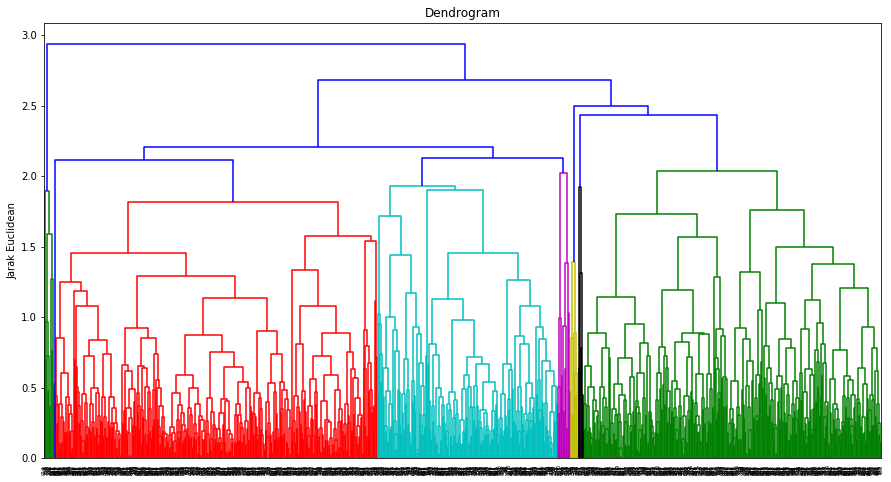

In [165]:
plt.figure(figsize=(15,8))
dendrogram3 = sch.dendrogram(sch.linkage(cluster_scaled, method = 'average'))
plt.title('Dendrogram')
plt.ylabel('Jarak Euclidean')
plt.show()

In [168]:
model1 = silhouette_score(cluster_scaled, y_hc, metric='euclidean')
model2 = silhouette_score(cluster_scaled, y_hc1, metric='euclidean')
model3 = silhouette_score(cluster_scaled, y_hc2, metric='euclidean')
model4 = silhouette_score(cluster_scaled, y_hc3, metric='euclidean')

print ("Hasil silhoutte score dari model Ward adalah", model1)
print ("Hasil silhoutte score dari model Complete adalah", model2)
print ("Hasil silhoutte score dari model Single adalah", model3)
print ("Hasil silhoutte score dari model Average adalah", model4)

Hasil silhoutte score dari model Ward adalah 0.23516132192529005
Hasil silhoutte score dari model Complete adalah 0.19214423102519423
Hasil silhoutte score dari model Single adalah 0.2718956499497036
Hasil silhoutte score dari model Average adalah 0.20684634295969734


### 3. Clustering with DBSCAN

**Algoritma DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** adalah salah satu algoritma yang digunakan untuk klasifikasi atau pengelompokan data. 

Masing-masing data / titik yang ada akan dibagi menjadi 3 bagian, yaitu:

1. **Titik Pusat / Core**
<br>Sebuah titik disebut sebagai titik pusat apabila terdapat sejumlah titik lain yang berada dalam radius titik tersebut

2. **Titik Terjangkau / Reachable**
<br>Sebuah titik disebut sebagai titik terjangkau apabila titik tersebut terhubung secara tidak langsung dengan titik pusat

3. **Titik Noise**
<br>Sebuah titik disebut sebagai titik Noise apabila titik tersebut tidak bisa dijadikan titik pusat, dan tidak dapat dijangkau dengan titik core terdekat

In [252]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [344]:
dbscan  = DBSCAN(eps=0.43)
model   = dbscan.fit_predict(cluster_scaled)

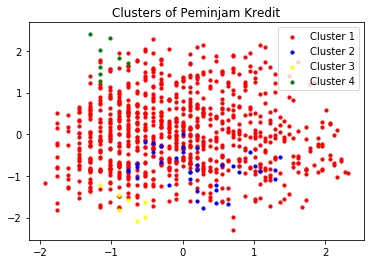

In [345]:
plt.scatter(cluster_scaled[model == 0, 0], cluster_scaled[model == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(cluster_scaled[model == 1, 0], cluster_scaled[model == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(cluster_scaled[model == 2, 0], cluster_scaled[model == 2, 1], s = 10, c = 'yellow', label = 'Cluster 3')
plt.scatter(cluster_scaled[model == 3, 0], cluster_scaled[model == 3, 1], s = 10, c = 'green', label = 'Cluster 4')
plt.title('Clusters of Peminjam Kredit')
plt.legend()
plt.show()

model ini hanya berfokus pada persebaran datanya yang ditentukan oleh nilai epsilon dan min_samples yang memungkinkan perubahan setiap nilai yang berbeda, memberikan *insight* hanya terhadap pola persebaran tanpa memperhatikan klasternya sehingga kurang baik digunakan pada kasus data ini.

In [346]:
print(silhouette_score(cluster_scaled, model,metric='euclidean'))

-0.035937041743632006


## 4. Evaluasi Model

### Pemilihan Model

Berdasarkan hasil model *Clustering* yang dibangkitkan, yaitu **K-means**, **Hierarchial Clustering**, dan **DBSCAN** dapat ditentukan untuk model terbaik yang kita pilih adalah **model K-means** dengan beberapa alasan sebagai berikut:

1. Kemampuan k-means untuk mempetakan kelompok variabel penelitian lebih tepat dan ditambah juga penggunaan *Affinity Propagation* membantu meningkatkan sensitivitas model terhadap kelas-kelas yang dibangkitkan.
2. Nilai *silhouette score* model K-means adalah yang terbesar dari beberapa model yang dibangkitkan.
3. Pengelompokan kelas oleh model k-means dapat diinterpretasi dengan sangat mudah namun akurat.
4. Model k-means memiliki persebaran yang cukup baik pada plot akhirnya.

### Kegunaan Model K-means

In [369]:
silhouette_score(cluster_scaled, labels, metric='euclidean')

0.302902483090709

In [368]:
grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)
grouped_af

,Age,Credit amount,Duration
Cluster,,,
0,28.7,5593.7,32.2
1,27.9,1654.3,15.1
2,46.0,1551.7,10.7
3,47.5,4977.9,27.6


Dengan model K-Means dan hasil klasterisasinya, dengan mudah kita dapatkan *insight* baru untuk segmentasi kostumer perusahaan kredit, diantaranya kita dapat mengetahui pembagian setiap kostumer kita sebagai berikut:

1. Cluster 0 adalah orang-orang yang memiliki jumlah kredit tinggi dengan usia relatif muda dan pengajuan durasi yang panjang.
2. Cluster 1 adalah orang-orang yang memiliki jumlah kredit rendah dengan usia relatif muda dan pengajuan durasi yang pendek.
3. Cluster 2 adalah orang-orang yang memiliki jumlah kredit rendah dengan usia relatif tua dan pengajuan durasi yang rendah.
4. Cluster 3 adalah orang-orang yang memiliki jumlah kredit tinggi dengan usia relatif tua dan pengajuan durasi yang lumayan panjang.

Sehingga dengan kategori klaster ini, kita dapat mengetahui pembagian segmentasi kostumer kita dan kita dapat mempertimbangkan klaster mana yang bisa kita utamakan untuk periode ini dan segmentasi kostumer mana yang menjadi target utama kita dalam  bulan-bulan kedepannya